In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# importing libraries/modules, and functions
import pandas as pd
import numpy as np
import scipy.stats as stats

# visualization libraries
import matplotlib as mlp
mlp.rcParams['figure.dpi'] = 200
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# created zillow library and functions
from wrangle import get_zillow_dataset, clean_zillow_dataset, zillow_outliers, train_validate_test_split

# sklearn library for data science
import sklearn

# just in case :) 
import env
from env import user, password, host, get_connection

----
``1. Load your zillow dataset.``

``2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.``

In [2]:
# importing zillow dataset
zillow_df = get_zillow_dataset()
zillow_df = clean_zillow_dataset(zillow_df)
print(zillow_df.shape)
zillow_df.head()

(2140235, 7)


,bedroom_count,bath_count,finished_sq_feet,year_built,fips,tax_amount,home_value
4,4,2.0,3633.0,2005,6037,6941.39,296425.0
6,3,4.0,1620.0,2011,6037,10244.94,847770.0
7,3,2.0,2077.0,1926,6037,7924.68,646760.0
11,0,0.0,1200.0,1972,6037,91.60,5328.0
14,0,0.0,171.0,1973,6037,255.17,6920.0


In [3]:
# cleaning for outliers
zillow_df = zillow_outliers(zillow_df)
zillow_df.shape # checks out!

(2065188, 7)

In [4]:
# splitting the data into train, validate, and test
train, validate, test = train_validate_test_split(zillow_df)

print(f'trains shape: {train.shape}')
print(f'validate shape: {validate.shape}')
print(f'test shape: {test.shape}')

trains shape: (1156505, 7)
validate shape: (495645, 7)
test shape: (413038, 7)


In [5]:
# setting independent/dependent variables in ea. sub-dataset

X_train = train.drop(columns=["home_value", "tax_amount"])
y_train = train.home_value

X_validate = validate.drop(columns=["home_value", "tax_amount"])
y_validate = validate.home_value

X_test = test.drop(columns=["home_value", "tax_amount"])
y_test = test.home_value

In [6]:
# let's generate an average baseline prediction

baseline_predictions = round(train["home_value"].mean(), 2)
baseline_predictions

379821.82

----
**``Notes:``**

* baseline prediction mean represents the predicted house value average for all observations/records in the zillow train dataset

* we can now consider including this back in either our train or X_train or leave as is??

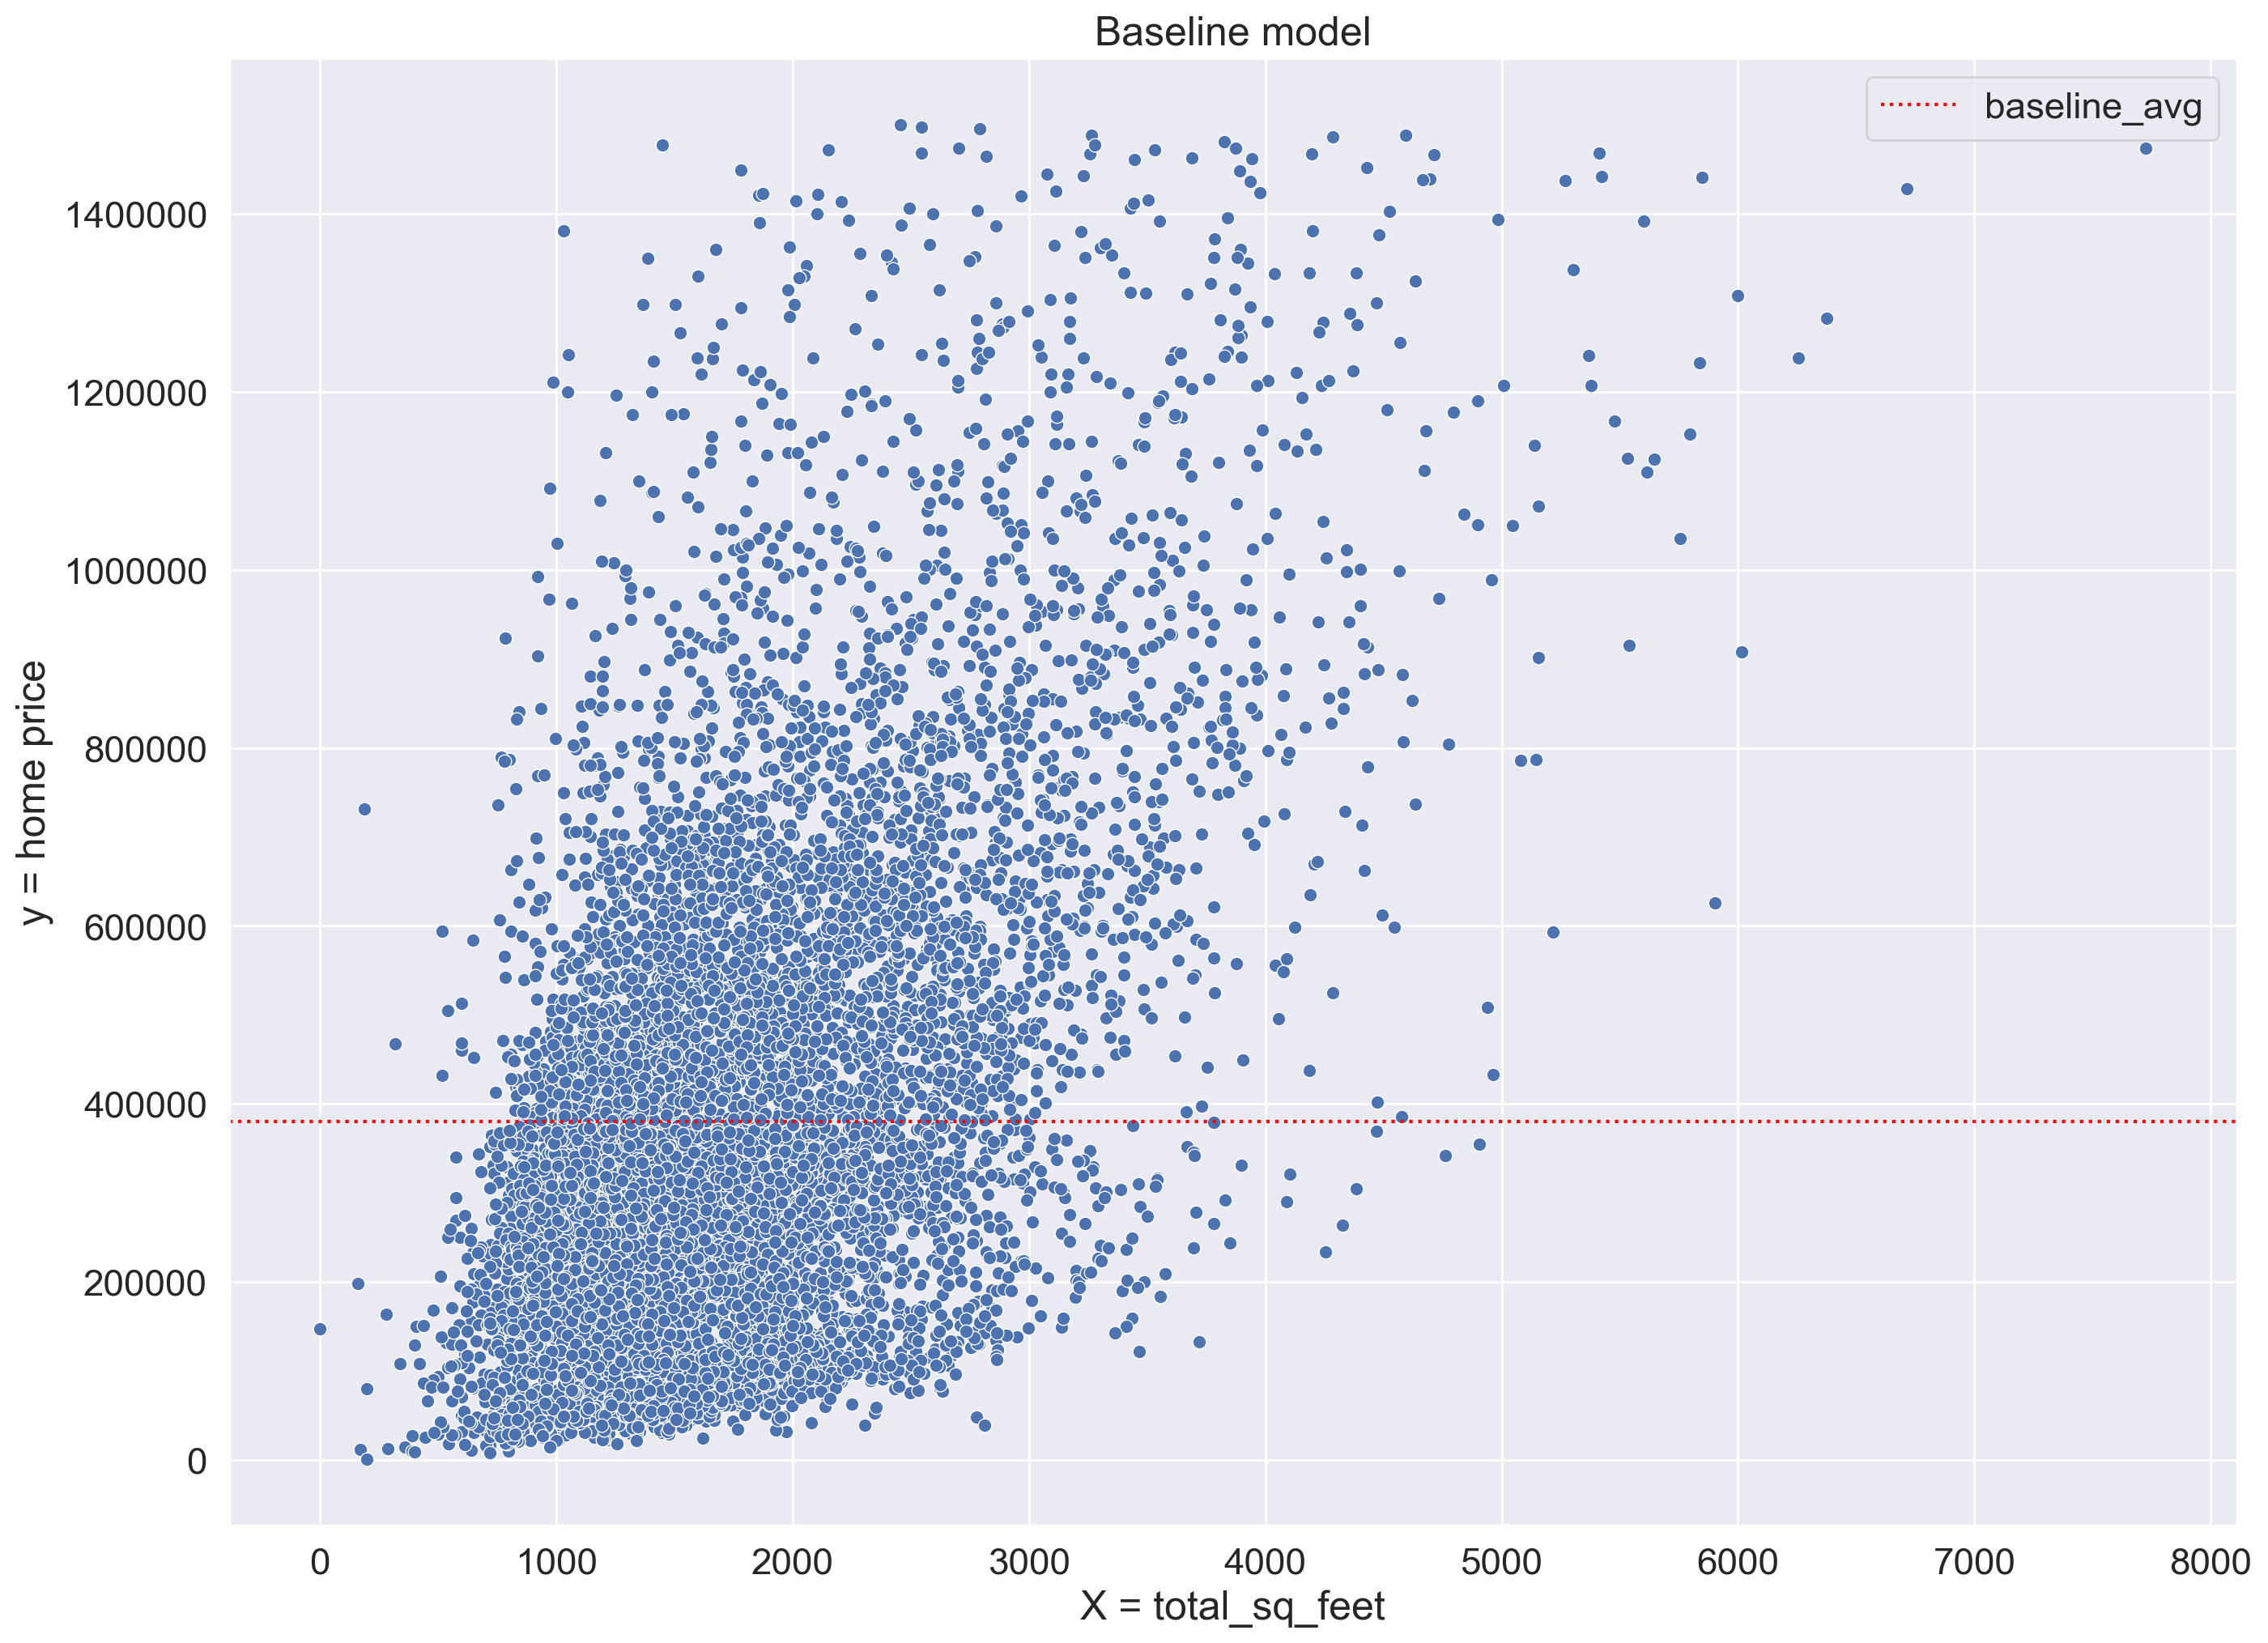

In [7]:
# let's plot the average baseline prediction home value against actual target values

plt.figure(figsize = (16, 12))
sns.set(font_scale = 1.5)

sns.scatterplot(x = "finished_sq_feet", y = "home_value", data = train.sample(10000), x_jitter = 0.5)
plt.ticklabel_format(style = "plain") # removing axes scientific notation 

plt.axhline(baseline_predictions, ls = ':', color = "red", label = "baseline_avg")
plt.xlabel('X = total_sq_feet')
plt.ylabel('y = home price')

plt.legend()
plt.title('Baseline model')
plt.show()

----
``creating and fitting a new home_value predictive model``

In [8]:
from sklearn.linear_model import LinearRegression

# creating the independent and dependent variables
X_var = pd.DataFrame(train.finished_sq_feet)
y_var = pd.DataFrame(train.home_value)

In [9]:
# creating the model

model = LinearRegression(normalize = True)
model.fit(X_var, y_var)
predictions = model.predict(X_var)

In [10]:
# let's create a dataframe with all four features:
# home_value (dependent variable)
# finished_sq_feet (independent variable)
# predicted avg. baseline home value
# created model predictions

df = pd.concat([X_var, y_var], axis = 1)
df["baseline"] = baseline_predictions

In [11]:
df.head()

,finished_sq_feet,home_value,baseline
1351144,897.0,289346.0,379821.82
1760193,1272.0,211722.0,379821.82
629506,666.0,36500.0,379821.82
385748,3246.0,900549.0,379821.82
884468,1870.0,769000.0,379821.82
